In [6]:
! pip install kaggle

In [7]:
# Move the Kaggle API key file to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
# extracting the compressed data unzip

# API to fetch data from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


 97% 158M/163M [00:01<00:00, 134MB/s]
100% 163M/163M [00:01<00:00, 138MB/s]


In [9]:
# the downloaded file is unzipped
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The data is extracted")



The data is extracted


In [10]:
# check file and folder at this content
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [11]:
#Importing the basic libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [12]:
# with mask holds all the image containing masks
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [13]:
print(f' The image containing mask face {with_mask_files[0:5]}')
print(f' The image containing maskless face {without_mask_files[0:5]}')

 The image containing mask face ['with_mask_2314.jpg', 'with_mask_20.jpg', 'with_mask_1367.jpg', 'with_mask_1764.jpg', 'with_mask_1893.jpg']
 The image containing maskless face ['without_mask_3606.jpg', 'without_mask_2506.jpg', 'without_mask_2593.jpg', 'without_mask_1088.jpg', 'without_mask_2533.jpg']


In [14]:
# the number of imgae with mask
print(f'the number of image with mask = {len(with_mask_files)}')
# the number of image without mask
print(f'the number of image without mask = {len(without_mask_files)}')

the number of image with mask = 3725
the number of image without mask = 3828


Creating label for mask and wihtout mask

mask -> 1

without mask -> 0

In [15]:
with_mask_label = [1] * 3725 # multiplied with length of the mask image
without_mask_label = [0] * 3828

In [16]:
print(with_mask_label[:5])
print(without_mask_label[:5])



[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
labels = with_mask_label + without_mask_label
print(len(labels))
print(labels[:5])
print(labels[-5:]) # print 5 numbers from last


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


** Displaying image **

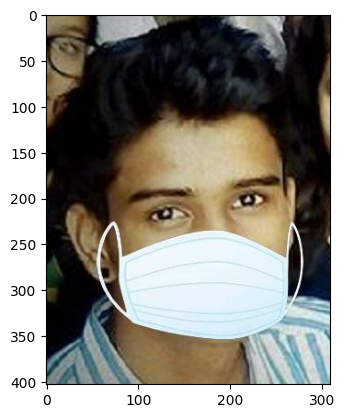

In [18]:
# displaying image with image
img = mpimg.imread('/content/data/with_mask/with_mask_1000.jpg')
image = plt.imshow(img)
plt.show()

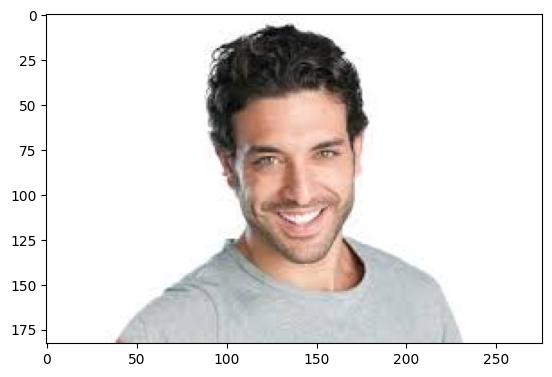

In [19]:
# displayig image without mask
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
image = plt.imshow(img)
plt.show()

**Image Processing**

In [20]:
# convert  image into numpy array
# for masked image
with_mask_path = "/content/data/with_mask/"
data =[]
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file) # convert to image of pillow object
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
  # for maskless image
without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file) # convert to image of pillow object
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)






/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data) # converted into array of all faces image

list

In [22]:
len(data) # this length equals to size of labels

7553

In [23]:
data[0]

array([[[213, 216, 221],
        [213, 216, 221],
        [214, 217, 222],
        ...,
        [241, 242, 247],
        [241, 242, 247],
        [241, 242, 247]],

       [[213, 216, 221],
        [213, 216, 221],
        [214, 217, 222],
        ...,
        [241, 242, 247],
        [241, 242, 247],
        [241, 242, 247]],

       [[213, 216, 221],
        [213, 216, 221],
        [214, 217, 222],
        ...,
        [241, 242, 247],
        [241, 242, 247],
        [241, 242, 247]],

       ...,

       [[125, 125, 137],
        [126, 126, 138],
        [129, 129, 141],
        ...,
        [230, 231, 236],
        [231, 232, 237],
        [229, 230, 235]],

       [[122, 122, 134],
        [123, 124, 136],
        [126, 126, 138],
        ...,
        [229, 230, 235],
        [230, 231, 236],
        [229, 230, 235]],

       [[119, 121, 133],
        [120, 122, 134],
        [123, 125, 137],
        ...,
        [228, 229, 234],
        [228, 229, 234],
        [228, 229, 234]]

In [24]:
type(data[0]) # type  for single image after converting to numpy array

numpy.ndarray

In [25]:
data[0].shape # we see as we have set in previous section

(128, 128, 3)

In [26]:
# converting image into numpy array
X = np.array(data)
y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
len(X)

7553

In [29]:
len(y)

7553

In [30]:
print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The shape of X is (7553, 128, 128, 3)
The shape of y is (7553,)


In [31]:
# Splitting the data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 2)
print(f"The shape of X is {X_train.shape}")
print(f"The shape of y is {y_test.shape}")
print(f"The shape of y is {y_train.shape}")

The shape of X is (6042, 128, 128, 3)
The shape of y is (1511,)
The shape of y is (6042,)


In [32]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[ 59,  45,  44],
        [ 66,  52,  51],
        [ 78,  64,  62],
        ...,
        [ 75,  56,  58],
        [ 84,  65,  67],
        [ 88,  69,  71]],

       [[ 62,  48,  47],
        [ 67,  53,  51],
        [ 78,  64,  61],
        ...,
        [ 73,  54,  56],
        [ 84,  65,  67],
        [ 90,  71,  73]],

       [[ 68,  54,  51],
        [ 72,  58,  55],
        [ 82,  68,  64],
        ...,
        [ 68,  49,  51],
        [ 81,  62,  64],
        [ 90,  71,  73]],

       ...,

       [[ 80,  78, 101],
        [ 75,  71,  93],
        [ 71,  69,  89],
        ...,
        [ 58,  43,  40],
        [ 59,  42,  40],
        [ 60,  42,  40]],

       [[ 79,  77,  98],
        [ 74,  72,  92],
        [ 72,  69,  89],
        ...,
        [ 58,  41,  38],
        [ 61,  43,  40],
        [ 62,  44,  42]],

       [[ 74,  73,  94],
        [ 71,  69,  89],
        [ 71,  68,  87],
        ...,
        [ 58,  39,  35],
        [ 60,  41,  38],
        [ 60,  42,  40]]

In [34]:
# printing after scaling
X_train_scaled[0]

array([[[0.23137255, 0.17647059, 0.17254902],
        [0.25882353, 0.20392157, 0.2       ],
        [0.30588235, 0.25098039, 0.24313725],
        ...,
        [0.29411765, 0.21960784, 0.22745098],
        [0.32941176, 0.25490196, 0.2627451 ],
        [0.34509804, 0.27058824, 0.27843137]],

       [[0.24313725, 0.18823529, 0.18431373],
        [0.2627451 , 0.20784314, 0.2       ],
        [0.30588235, 0.25098039, 0.23921569],
        ...,
        [0.28627451, 0.21176471, 0.21960784],
        [0.32941176, 0.25490196, 0.2627451 ],
        [0.35294118, 0.27843137, 0.28627451]],

       [[0.26666667, 0.21176471, 0.2       ],
        [0.28235294, 0.22745098, 0.21568627],
        [0.32156863, 0.26666667, 0.25098039],
        ...,
        [0.26666667, 0.19215686, 0.2       ],
        [0.31764706, 0.24313725, 0.25098039],
        [0.35294118, 0.27843137, 0.28627451]],

       ...,

       [[0.31372549, 0.30588235, 0.39607843],
        [0.29411765, 0.27843137, 0.36470588],
        [0.27843137, 0

**Building CNN**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
model = keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape =(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5))

model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5))

model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))



In [37]:
#model compiling
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics =['accuracy'])

In [49]:
history = model.fit(X_train_scaled,y_train, validation_split = 0.1, epochs = 100)

Epoch 1/100
170/170 [==============================] - 3s 19ms/step - loss: 0.1342 - accuracy: 0.9502 - val_loss: 0.2207 - val_accuracy: 0.9207
Epoch 2/100
170/170 [==============================] - 3s 17ms/step - loss: 0.1036 - accuracy: 0.9614 - val_loss: 0.2482 - val_accuracy: 0.9174
Epoch 3/100
170/170 [==============================] - 3s 18ms/step - loss: 0.0866 - accuracy: 0.9680 - val_loss: 0.2219 - val_accuracy: 0.9339
Epoch 4/100
170/170 [==============================] - 3s 19ms/step - loss: 0.0734 - accuracy: 0.9733 - val_loss: 0.2783 - val_accuracy: 0.9140
Epoch 5/100
170/170 [==============================] - 3s 17ms/step - loss: 0.0720 - accuracy: 0.9739 - val_loss: 0.2986 - val_accuracy: 0.9388
Epoch 6/100
170/170 [==============================] - 3s 17ms/step - loss: 0.0683 - accuracy: 0.9755 - val_loss: 0.2354 - val_accuracy: 0.9421
Epoch 7/100
170/170 [==============================] - 3s 18ms/step - loss: 0.0657 - accuracy: 0.9779 - val_loss: 0.2611 - val_accuracy:

In [39]:
loss, accuracy = model.evaluate(X_test_scaled,y_test)

48/48 [==============================] - 1s 11ms/step - loss: 0.2088 - accuracy: 0.9285


In [40]:
print(f"Model loss = {loss}")
print(f"Model accuracy = {accuracy}")

Model loss = 0.20877832174301147
Model accuracy = 0.9285241365432739


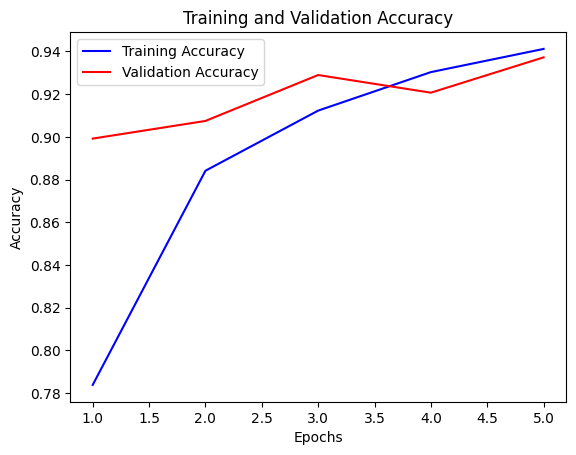

In [48]:
# Ploting the curve
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#plotting losses

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

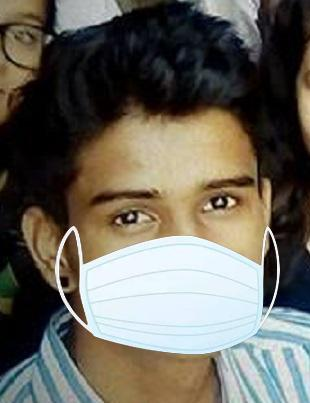

1/1 [==============================] - 0s 28ms/step
[[2.6719524e-18 9.9879187e-01]]
The face is mask


In [56]:
# predictive system

input_image_path = "/content/data/with_mask/with_mask_1000.jpg"

input_image =cv2.imread(input_image_path)# reading image

cv2_imshow(input_image) # showing image

input_image_resize = cv2.resize(input_image,(128,128)) # resizing input_image into 128,128

image_scaled = input_image_resize/255 # scaling the image

input_image_reshape = np.reshape(image_scaled, [1,128,128,3]) # reshaping the scaled image

pred = model.predict(input_image_reshape)

print(pred)

# option 2
predict_label = np.argmax(pred)

if predict_label == 1:
  print("The face is covered with mask")

else:
  print("The face is without mask")



